* Group Members: 
   <ul>
   <li>Dennis Wandera</li>
   <li>Julian </li>
   <li>Nduku</li>
   <li>Sharon Chebet</li>
   <li>Omara</li>
   </ul>
 <p>

## Business Understanding

## Project Overview
For this project, we will perform regression modeling to analyze house sales in King County using the provided dataset kc_house_data.csv. Our goal is to provide insights into how various features of a house influence its sale price, which can be valuable for a real estate agency advising homeowners on potential home renovations and their impact on home value.

## Ojectives
<ul>
<li>Optimizing House Pricing Strategies</li>

<li>Estimating Renovation Impact on House Value</li>

<li>Identifying Factors Influencing House Sale Speed</li>

<li>Predicting the Optimal Time to Sell a House</li>



## Data Limitation


## Data Understanding

### Data Structure

## Column Names and descriptions for Kings County Data Set
The following are the descriptions of the columns in the dataset.

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors



## Importing necessary libraries

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings


warnings.filterwarnings('ignore')

## Reading the data sets

In [178]:
# reading the kc house data into a data frame called df
df =pd.read_csv('C:/Users/Sharon.Chebet/Documents/Course materials/dsc-group-6-phase-2-project/data/kc_house_data.csv')
df.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [180]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [181]:
# Correcting data types (example: converting date column to datetime)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [183]:
# Handle missing values
df['waterfront'].fillna(0, inplace=True)  # Assuming NaN means no waterfront
df['view'].fillna(0, inplace=True)        # Assuming NaN means no view
df['yr_renovated'].fillna(0, inplace=True)  # Assuming NaN means no renovation
df['sqft_basement'].fillna(0, inplace=True) # assuming Nan means no basement

In [184]:
# Convert date column to datetime
df['date']=pd. to_datetime (df['date'])

In [185]:
# Encode categorical variables
#df['waterfront'] =df['waterfront'].astype('category')

In [186]:
#df['sqft_basement'] .unique()

In [187]:
# Nomalize the  numerical columns data 
# Select only numerical columns for plotting
numerical_columns = df.select_dtypes(include=['number'])
scaler =StandardScaler () # initialize the standard scaller
#numerical_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
numerical_features =df.select_dtypes(include=['number'])

Normalization and standardization are techniques used to rescale numerical features so they have similar scales, which can improve the performance and training stability of machine learning models

In [188]:
# cleaned dataset lets call it data
df.head()
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [189]:
# Select only numerical columns for plotting
numerical_columns = df.select_dtypes(include=['number'])
# aggregate function that contains the minimum and maximum values for each numeric column
numerical_columns.agg(['min', 'max'])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
min,1000102,78000.0,1,0.5,370,520,1.0,0.0,0.0,1,3,370,0.0,1900,0.0,98001,47.1559,-122.519,399,651
max,9900000190,7700000.0,33,8.0,13540,1651359,3.5,1.0,4.0,5,13,9410,4820.0,2015,2015.0,98199,47.7776,-121.315,6210,871200


## Exploratory Data Analysis (EDA)

In [190]:
# provides a summary of key statistical measures for each numeric column
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,2014-10-29 04:20:38.171968512,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,...,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
min,1.000102e+06,2014-05-02 00:00:00,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,...,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876736e+09,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,...,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950


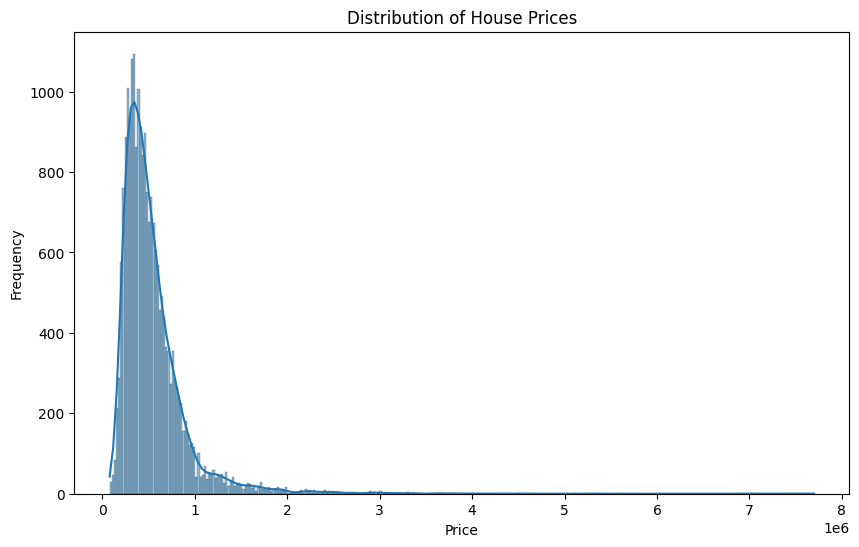

In [191]:
# Plot the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The house prices are right-skewed, indicating that most houses are priced on the lower end, with a few very high-priced houses.


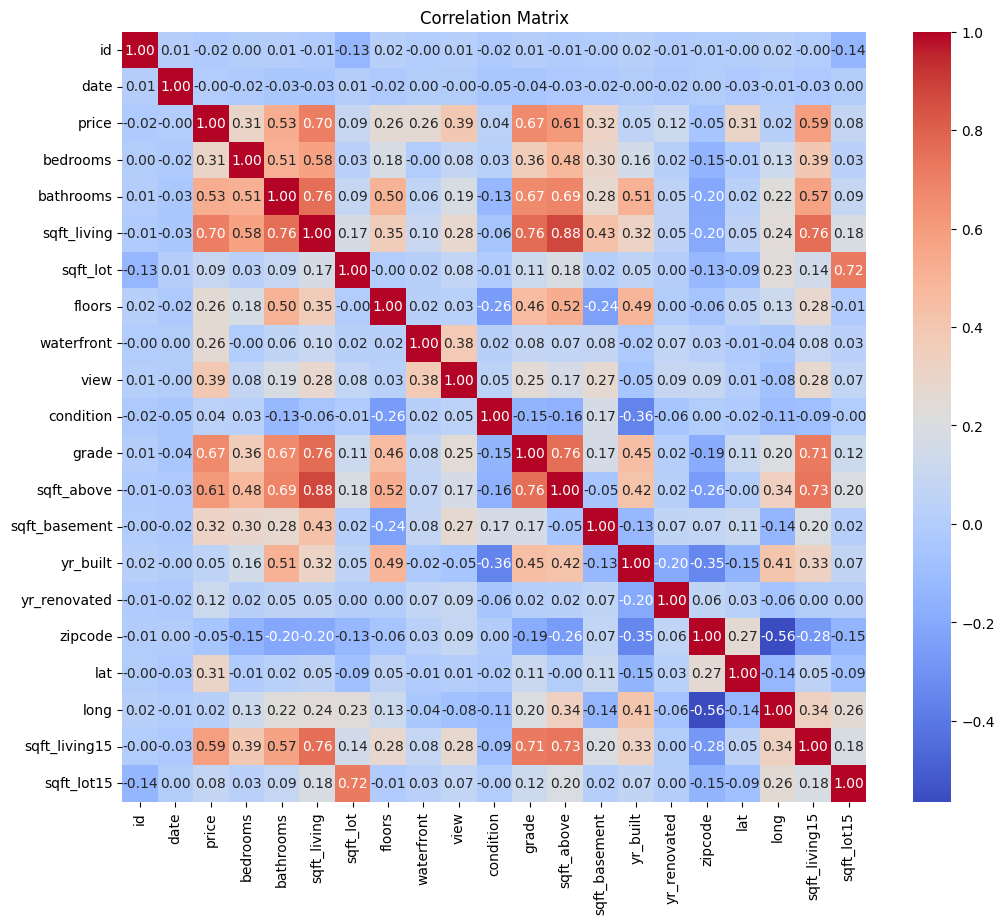

In [192]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


<b>Obesrvation from correlation corr_matrix <b>

There is a strong positive correlation between sqft_living and price.

grade and sqft_above also show significant positive correlations with price.

Features like bathrooms and sqft_living15 also correlate positively with price.

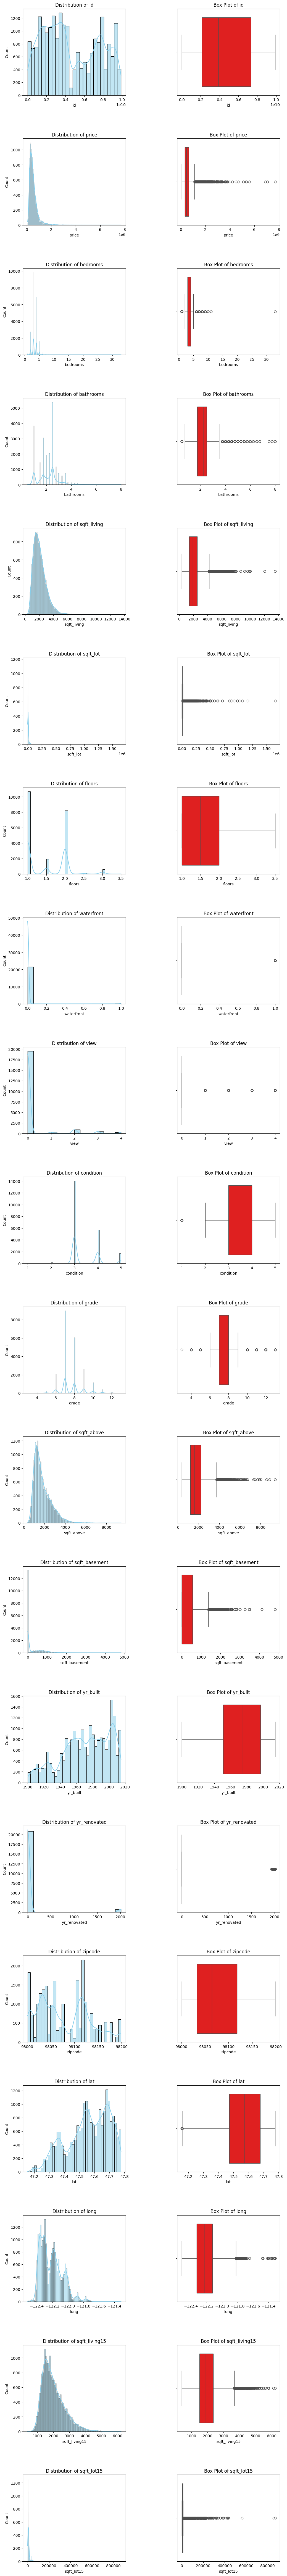

In [193]:
# Set up subplots for distribution plots
fig, axes = plt.subplots(nrows=len(numerical_columns.columns), ncols=2, figsize=(12, 6 * len(numerical_columns.columns)))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Create distribution plots (histograms or KDE plots)
for i, column in enumerate(numerical_columns.columns):
    ax = axes[i, 0]
    
    sns.histplot(data=numerical_columns, x=column, kde=True, color='skyblue', ax=ax)
    
    ax.set_xlabel(column)
    ax.set_title(f'Distribution of {column}')

# Create box plots for presence of outliers
for i, column in enumerate(numerical_columns.columns):
    ax = axes[i, 1]
    
    sns.boxplot(data=numerical_columns, x=column, color='red', ax=ax)
    
    ax.set_xlabel(column)
    ax.set_title(f'Box Plot of {column}')
plt.show()

In [194]:
def remove_outliers(df, columns_to_check, outlier_threshold=1.5):

    for column in columns_to_check:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outlier detection
        lower_bound = Q1 - outlier_threshold * IQR
        upper_bound = Q3 + outlier_threshold * IQR

        # Remove outliers based on the bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return df

columns_to_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']
outlier_threshold = 1.5
remove_outliers(df, columns_to_check, outlier_threshold)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [195]:
#Detecting Outliers
data = np.array([df['bedrooms']]) #create an array from the Dataframe column
mean = np.mean(data)
std = np.std(data)
z_scores = (data - mean) / std
outliers = np.where(np.abs(z_scores) > 3)

#Count of outliers
outlier_count = len(outliers[0])

# print("Outlier indices:", outliers)
print("Outlier values:", data[outliers])
print("Number of outliers:", outlier_count)

Outlier values: [ 7  7  7  8  7  7  8  8  9  9  7  7  7  9  8  7  7  7  7  9  7 11  8  7
  8  7  7  7  7  8  7  7  7  7  7  8  7 10  7  7  7  7  8 10  7  7  8  7
 33  7  7  9  8  7  9  7  8  7  7 10  8  7]
Number of outliers: 62


In [196]:
df.shape

(21597, 21)

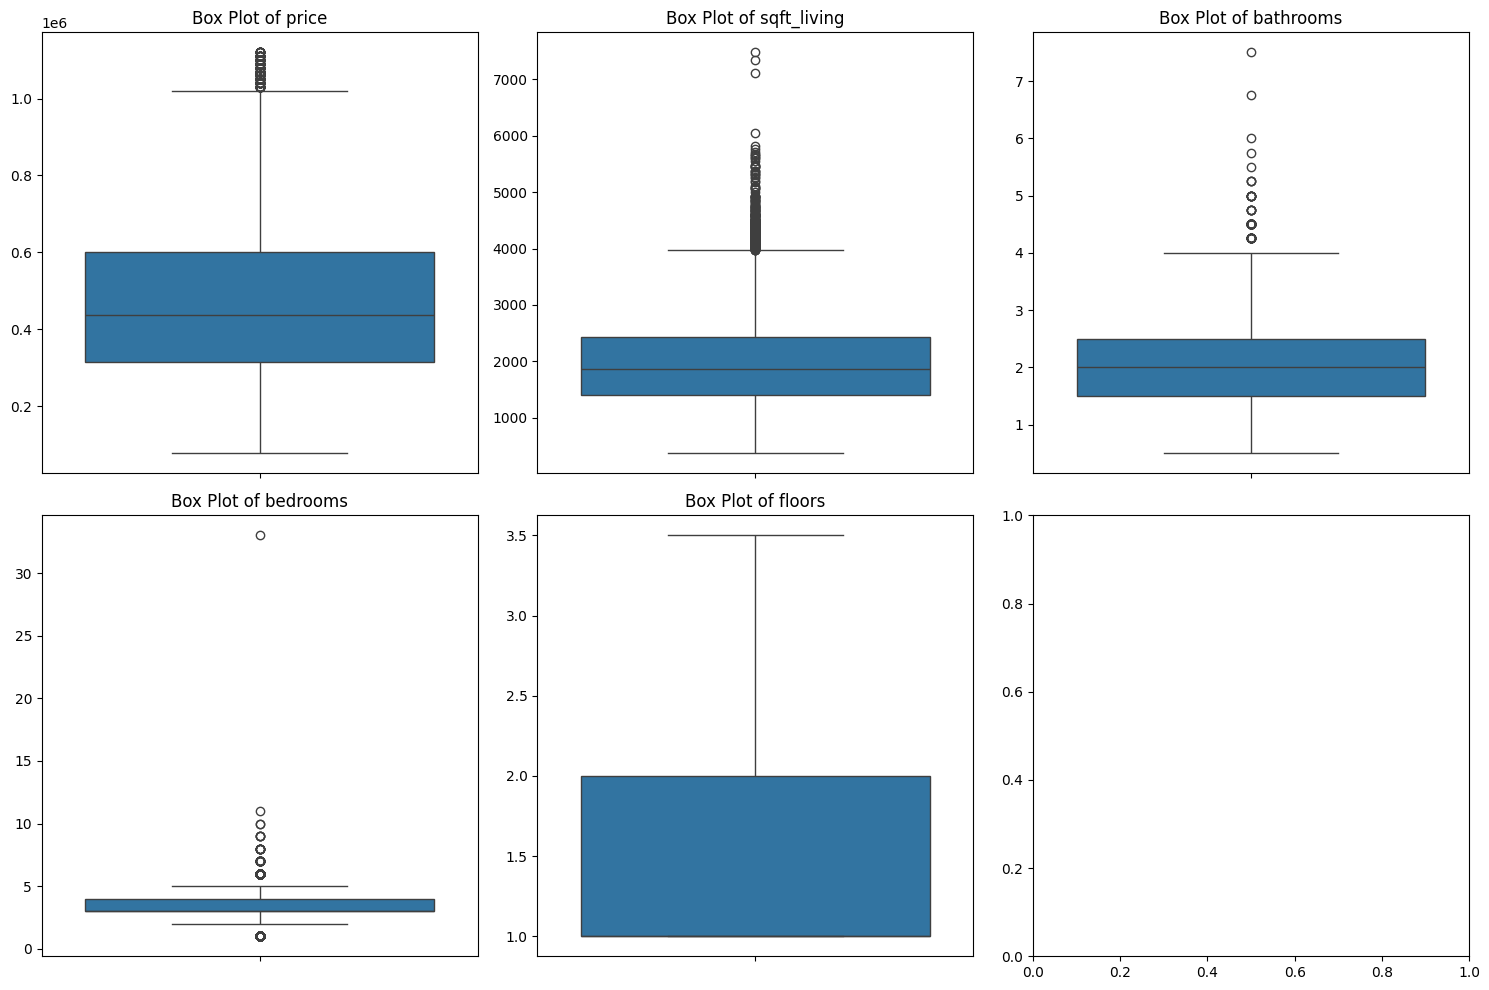

In [197]:
#Select the variables with potential outliers
df=remove_outliers(df, columns_to_check, outlier_threshold)
variables_of_interest = ['price', 'sqft_living', 'bathrooms', 'bedrooms', 'floors']

# Create subplots for box plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterate through the variables and create box plots
for i, var in enumerate(variables_of_interest):
    sns.boxplot(data=df, y=var, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Box Plot of {var}')
    axes[i // 3, i % 3].set_ylabel('')
    axes[i // 3, i % 3].set_xlabel('')

# Adjust subplot layout
plt.tight_layout()
plt.show()

In [198]:
# Importing libraries for linear regression modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Optional: Importing Statsmodels for detailed regression results
import statsmodels as sm
from statsmodels.formula.api import ols 

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20439 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20439 non-null  int64         
 1   date           20439 non-null  datetime64[ns]
 2   price          20439 non-null  float64       
 3   bedrooms       20439 non-null  int64         
 4   bathrooms      20439 non-null  float64       
 5   sqft_living    20439 non-null  int64         
 6   sqft_lot       20439 non-null  int64         
 7   floors         20439 non-null  float64       
 8   waterfront     20439 non-null  float64       
 9   view           20439 non-null  float64       
 10  condition      20439 non-null  int64         
 11  grade          20439 non-null  int64         
 12  sqft_above     20439 non-null  int64         
 13  sqft_basement  20439 non-null  float64       
 14  yr_built       20439 non-null  int64         
 15  yr_renovated   20439 non

# Model 1

Identify the most relevant features for predicting house prices

In [200]:
# Future Selection
# Selecting relevant features for regression modeling
# removed 'sqft_basement', because its an object shall review it
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','yr_built', 'yr_renovated','zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
X = df [selected_features]
y = df['price']

In [201]:
#Model training
# Split the data into training and testing datasets
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size = 0.2,random_state=42)
#Train a linear regression model
model = LinearRegression()
model.fit(X_train,y_train)

# Predict on the test set
y_pred = model.predict(X_test)



In [202]:
formula = 'y~X'
model = ols(formula,df).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2761.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:18:18   Log-Likelihood:            -2.6706e+05
No. Observations:               20439   AIC:                         5.342e+05
Df Residuals:                   20421   BIC:                         5.343e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.138e+06   1.71e+06     -4.164      0.000   -1.05e+07   -3.78e+06
X[0]       -9391.8233   1136.030     -8.267      0.000   -1.16e+04   -7165.114
X[1]        2.351e+04   1961.590     11.988      0.000    1.97e+04    2.74e+04
X[2]          71.3611      2.770     25.766      0.000      65.932      76.790
X[3]           0.2318      0.029      8.113      0.000       0.176       0.288
X[4]        3.303e+04   2151.471     15.351      0.000    2.88e+04    3.72e+04
X[5]        1.308e+05   1.68e+04      7.806      0.000    9.79e+04    1.64e+05
X[6]         3.08e+04   1382.827     22.275      0.000    2.81e+04    3.35e+04
X[7]        2.682e+04   1375.121     19.506      0.000    2.41e+04    2.95e+04
X[8]         7.24e+04   1302.666     55.578      0.000    6.98e+04     7.5e+04
X[9]           0.9355      2.720      0.344      0.731      -4.397       6.268
X[10]      -1792.2169     43.171    -41.515      0.000   -1876.835   -1707.599
X[11]         15.9622      2.450      6.515      0.000      11.160      20.764
X[12]       -223.3675     19.344    -11.547      0.000    -261.283    -185.452
X[13]       5.462e+05   6184.645     88.321      0.000    5.34e+05    5.58e+05
X[14]      -5.017e+04   7638.723     -6.568      0.000   -6.51e+04   -3.52e+04
X[15]         47.9002      2.189     21.887      0.000      43.611      52.190
X[16]         -0.1465      0.044     -3.360      0.001      -0.232      -0.061
==============================================================================
Omnibus:                     1657.187   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3020.771
Skew:                           0.579   Prob(JB):                         0.00
Kurtosis:                       4.486   Cond. No.                     2.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Evaluation

In [203]:
#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 12130764483.290339
R2 Score: 0.7093063368542198


The R2 score indicates that the model explains approximately 69% of the variance in the house prices, which is a reasonably good fit for the data.

### Visualization

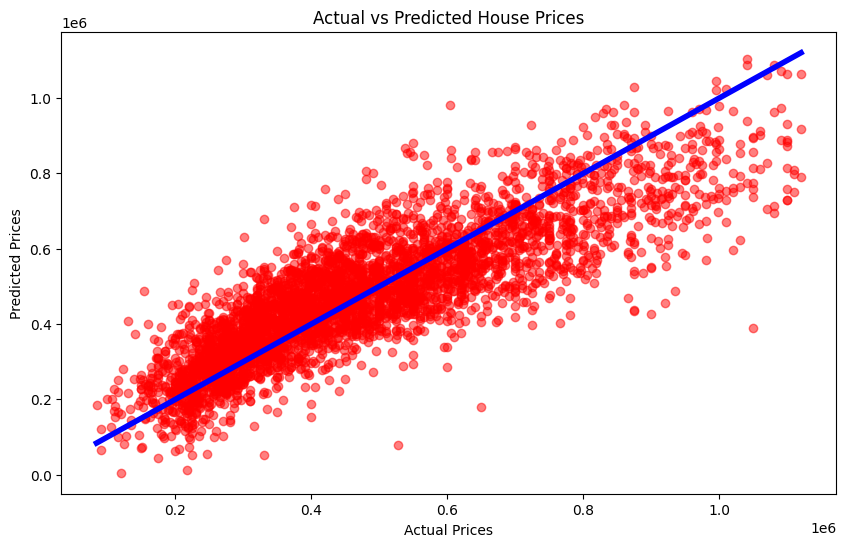

In [204]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4, color='blue')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [205]:
formula = 'y~X'
model = ols (formula,df).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2761.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:18:18   Log-Likelihood:            -2.6706e+05
No. Observations:               20439   AIC:                         5.342e+05
Df Residuals:                   20421   BIC:                         5.343e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.138e+06   1.71e+06     -4.164      0.000   -1.05e+07   -3.78e+06
X[0]       -9391.8233   1136.030     -8.267      0.000   -1.16e+04   -7165.114
X[1]        2.351e+04   1961.590     11.988      0.000    1.97e+04    2.74e+04
X[2]          71.3611      2.770     25.766      0.000      65.932      76.790
X[3]           0.2318      0.029      8.113      0.000       0.176       0.288
X[4]        3.303e+04   2151.471     15.351      0.000    2.88e+04    3.72e+04
X[5]        1.308e+05   1.68e+04      7.806      0.000    9.79e+04    1.64e+05
X[6]         3.08e+04   1382.827     22.275      0.000    2.81e+04    3.35e+04
X[7]        2.682e+04   1375.121     19.506      0.000    2.41e+04    2.95e+04
X[8]         7.24e+04   1302.666     55.578      0.000    6.98e+04     7.5e+04
X[9]           0.9355      2.720      0.344      0.731      -4.397       6.268
X[10]      -1792.2169     43.171    -41.515      0.000   -1876.835   -1707.599
X[11]         15.9622      2.450      6.515      0.000      11.160      20.764
X[12]       -223.3675     19.344    -11.547      0.000    -261.283    -185.452
X[13]       5.462e+05   6184.645     88.321      0.000    5.34e+05    5.58e+05
X[14]      -5.017e+04   7638.723     -6.568      0.000   -6.51e+04   -3.52e+04
X[15]         47.9002      2.189     21.887      0.000      43.611      52.190
X[16]         -0.1465      0.044     -3.360      0.001      -0.232      -0.061
==============================================================================
Omnibus:                     1657.187   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3020.771
Skew:                           0.579   Prob(JB):                         0.00
Kurtosis:                       4.486   Cond. No.                     2.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [206]:
len(df2.columns)

12

In [207]:
df.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.002773,0.010322,0.009568,0.023316,0.007061,-0.132480,0.029187,-0.002487,0.017578,...,0.031407,0.009799,-0.004210,0.025090,-0.012966,-0.005922,0.002829,0.021236,0.011105,-0.142069
date,0.002773,1.000000,-0.009532,-0.015407,-0.036402,-0.036960,0.002293,-0.021995,-0.006800,0.001862,...,-0.045211,-0.030139,-0.015052,-0.002934,-0.018539,0.002852,-0.034420,-0.008503,-0.034148,-0.000983
price,0.010322,-0.009532,1.000000,0.294144,0.454959,0.621362,0.093554,0.273360,0.048950,0.236239,...,0.630980,0.529931,0.230675,0.061264,0.081612,-0.018384,0.431026,0.072262,0.562024,0.082413
bedrooms,0.009568,-0.015407,0.294144,1.000000,0.490657,0.584802,0.024595,0.155140,-0.025784,0.037042,...,0.319519,0.463983,0.275352,0.161050,0.002181,-0.148499,-0.029801,0.140225,0.371324,0.021835
bathrooms,0.023316,-0.036402,0.454959,0.490657,1.000000,0.716700,0.064993,0.502707,-0.005380,0.095679,...,0.613962,0.638466,0.216803,0.544843,0.023578,-0.206867,-0.008878,0.248774,0.528951,0.065192
sqft_living,0.007061,-0.036960,0.621362,0.584802,0.716700,1.000000,0.159058,0.340518,0.000832,0.166611,...,0.705223,0.853404,0.369106,0.354009,0.019264,-0.204303,0.011149,0.286600,0.738126,0.173137
sqft_lot,-0.132480,0.002293,0.093554,0.024595,0.064993,0.159058,1.000000,-0.017066,0.025095,0.079285,...,0.094244,0.162765,0.011572,0.042480,0.007285,-0.129916,-0.094700,0.222356,0.143315,0.709214
floors,0.029187,-0.021995,0.273360,0.155140,0.502707,0.340518,-0.017066,1.000000,-0.005946,-0.013810,...,0.457583,0.528746,-0.291962,0.511811,-0.003499,-0.064801,0.036250,0.135760,0.268622,-0.021290
waterfront,-0.002487,-0.006800,0.048950,-0.025784,-0.005380,0.000832,0.025095,-0.005946,1.000000,0.273535,...,-0.013312,-0.009293,0.018916,-0.035014,0.053517,0.044240,-0.041823,-0.054482,0.004390,0.030986
view,0.017578,0.001862,0.236239,0.037042,0.095679,0.166611,0.079285,-0.013810,0.273535,1.000000,...,0.130575,0.066117,0.194587,-0.066981,0.055781,0.101257,-0.027212,-0.076251,0.185539,0.076573


In [208]:
correlations = df2.drop(['price','yr_built','yr_renovated'], axis=1).corr().sum() / (len(df2.columns))
correlations 

date             0.066761
bedrooms         0.274887
bathrooms        0.350657
sqft_living      0.390988
sqft_lot         0.125204
floors           0.221139
grade            0.327136
sqft_above       0.347221
sqft_basement    0.122942
dtype: float64

In [209]:
df.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.002773,0.010322,0.009568,0.023316,0.007061,-0.132480,0.029187,-0.002487,0.017578,...,0.031407,0.009799,-0.004210,0.025090,-0.012966,-0.005922,0.002829,0.021236,0.011105,-0.142069
date,0.002773,1.000000,-0.009532,-0.015407,-0.036402,-0.036960,0.002293,-0.021995,-0.006800,0.001862,...,-0.045211,-0.030139,-0.015052,-0.002934,-0.018539,0.002852,-0.034420,-0.008503,-0.034148,-0.000983
price,0.010322,-0.009532,1.000000,0.294144,0.454959,0.621362,0.093554,0.273360,0.048950,0.236239,...,0.630980,0.529931,0.230675,0.061264,0.081612,-0.018384,0.431026,0.072262,0.562024,0.082413
bedrooms,0.009568,-0.015407,0.294144,1.000000,0.490657,0.584802,0.024595,0.155140,-0.025784,0.037042,...,0.319519,0.463983,0.275352,0.161050,0.002181,-0.148499,-0.029801,0.140225,0.371324,0.021835
bathrooms,0.023316,-0.036402,0.454959,0.490657,1.000000,0.716700,0.064993,0.502707,-0.005380,0.095679,...,0.613962,0.638466,0.216803,0.544843,0.023578,-0.206867,-0.008878,0.248774,0.528951,0.065192
sqft_living,0.007061,-0.036960,0.621362,0.584802,0.716700,1.000000,0.159058,0.340518,0.000832,0.166611,...,0.705223,0.853404,0.369106,0.354009,0.019264,-0.204303,0.011149,0.286600,0.738126,0.173137
sqft_lot,-0.132480,0.002293,0.093554,0.024595,0.064993,0.159058,1.000000,-0.017066,0.025095,0.079285,...,0.094244,0.162765,0.011572,0.042480,0.007285,-0.129916,-0.094700,0.222356,0.143315,0.709214
floors,0.029187,-0.021995,0.273360,0.155140,0.502707,0.340518,-0.017066,1.000000,-0.005946,-0.013810,...,0.457583,0.528746,-0.291962,0.511811,-0.003499,-0.064801,0.036250,0.135760,0.268622,-0.021290
waterfront,-0.002487,-0.006800,0.048950,-0.025784,-0.005380,0.000832,0.025095,-0.005946,1.000000,0.273535,...,-0.013312,-0.009293,0.018916,-0.035014,0.053517,0.044240,-0.041823,-0.054482,0.004390,0.030986
view,0.017578,0.001862,0.236239,0.037042,0.095679,0.166611,0.079285,-0.013810,0.273535,1.000000,...,0.130575,0.066117,0.194587,-0.066981,0.055781,0.101257,-0.027212,-0.076251,0.185539,0.076573


In [210]:
# Define the target variable and features
#X = df_with_final_model_columns.drop(columns=['price'])
#y = df_no_outliers_no_missing_values['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [211]:
# Initialize and fit the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 12130764483.290339
Mean Absolute Error: 84309.67971905455
R-squared: 0.7093063368542198


In [212]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2761.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:18:19   Log-Likelihood:            -2.6706e+05
No. Observations:               20439   AIC:                         5.342e+05
Df Residuals:                   20421   BIC:                         5.343e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.138e+06   1.71e+06     -4.164      0.000   -1.05e+07   -3.78e+06
X[0]       -9391.8233   1136.030     -8.267      0.000   -1.16e+04   -7165.114
X[1]        2.351e+04   1961.590     11.988      0.000    1.97e+04    2.74e+04
X[2]          71.3611      2.770     25.766      0.000      65.932      76.790
X[3]           0.2318      0.029      8.113      0.000       0.176       0.288
X[4]        3.303e+04   2151.471     15.351      0.000    2.88e+04    3.72e+04
X[5]        1.308e+05   1.68e+04      7.806      0.000    9.79e+04    1.64e+05
X[6]         3.08e+04   1382.827     22.275      0.000    2.81e+04    3.35e+04
X[7]        2.682e+04   1375.121     19.506      0.000    2.41e+04    2.95e+04
X[8]         7.24e+04   1302.666     55.578      0.000    6.98e+04     7.5e+04
X[9]           0.9355      2.720      0.344      0.731      -4.397       6.268
X[10]      -1792.2169     43.171    -41.515      0.000   -1876.835   -1707.599
X[11]         15.9622      2.450      6.515      0.000      11.160      20.764
X[12]       -223.3675     19.344    -11.547      0.000    -261.283    -185.452
X[13]       5.462e+05   6184.645     88.321      0.000    5.34e+05    5.58e+05
X[14]      -5.017e+04   7638.723     -6.568      0.000   -6.51e+04   -3.52e+04
X[15]         47.9002      2.189     21.887      0.000      43.611      52.190
X[16]         -0.1465      0.044     -3.360      0.001      -0.232      -0.061
==============================================================================
Omnibus:                     1657.187   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3020.771
Skew:                           0.579   Prob(JB):                         0.00
Kurtosis:                       4.486   Cond. No.                     2.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##  model 2  after dropping some variables

Results shows that model 1 is better

In [218]:
# Drop unnecessary columns
df2 = df.drop(columns=['id', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view', 'waterfront', 'condition', ])

Mean Squared Error: 22214271026.657467
R2 Score: 0.46767181674763747


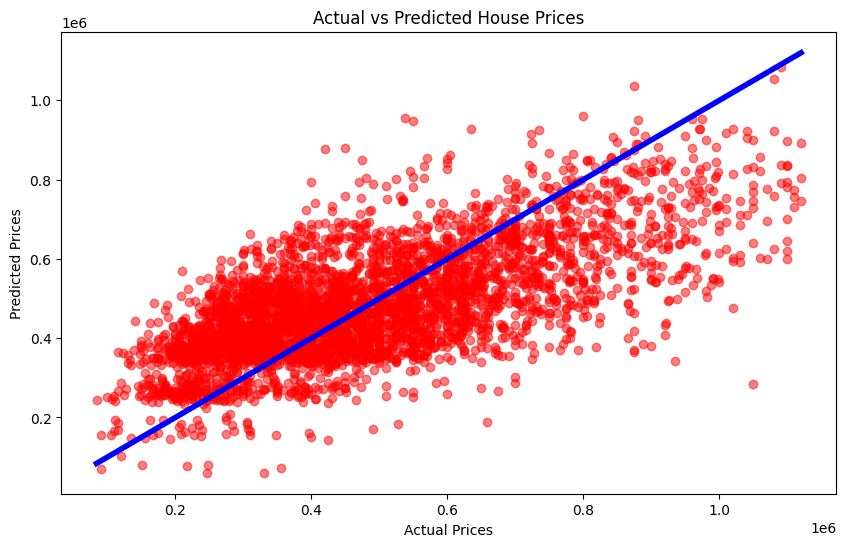

In [217]:
# Future Selection
# Selecting relevant features for regression modeling
# removed 'sqft_basement', because its an object shall review it
#selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',  'grade', 'sqft_above','sqft_basement']
selected_features = ['bedrooms', 'bathrooms', 'sqft_living',  'grade', 'sqft_above']
X = df2 [selected_features]
y = df2 ['price']

#Model training
# Split the data into training and testing datasets
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size = 0.2,random_state=42)
#Train a linear regression model
model = LinearRegression()
model.fit(X_train,y_train)

# Predict on the test set
y_pred = model.predict(X_test)

#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4, color='blue')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()




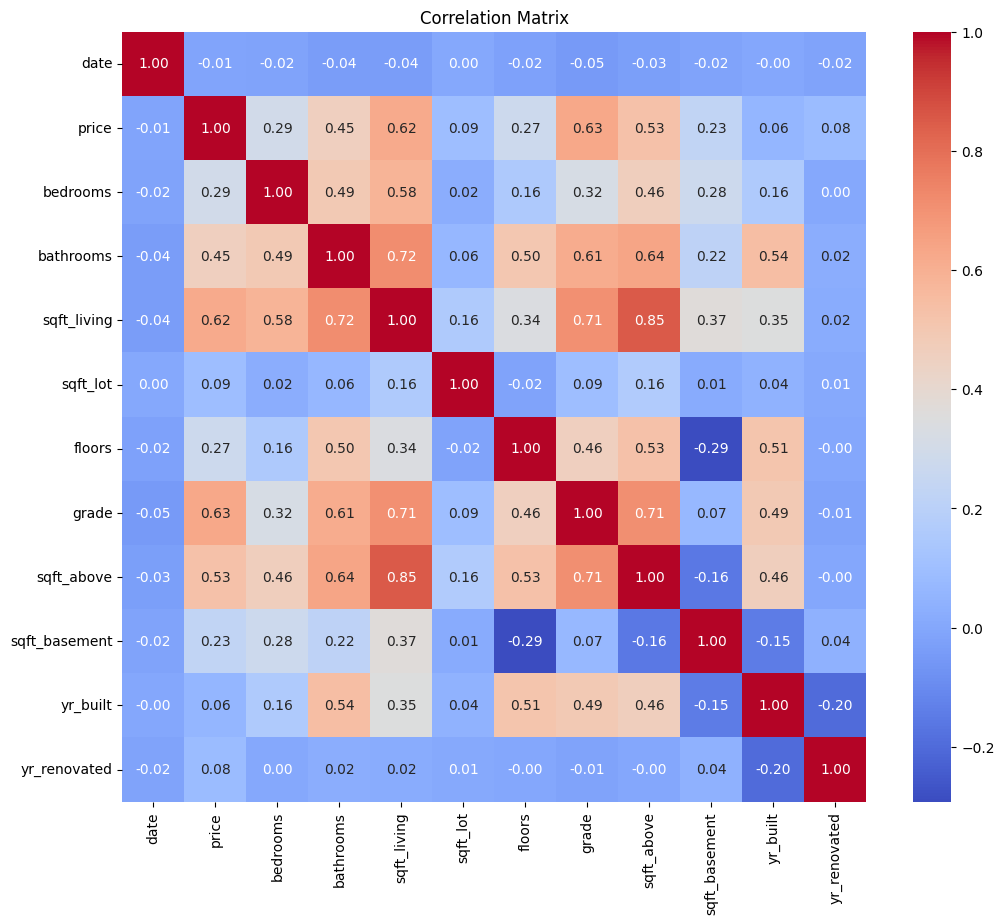

In [215]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

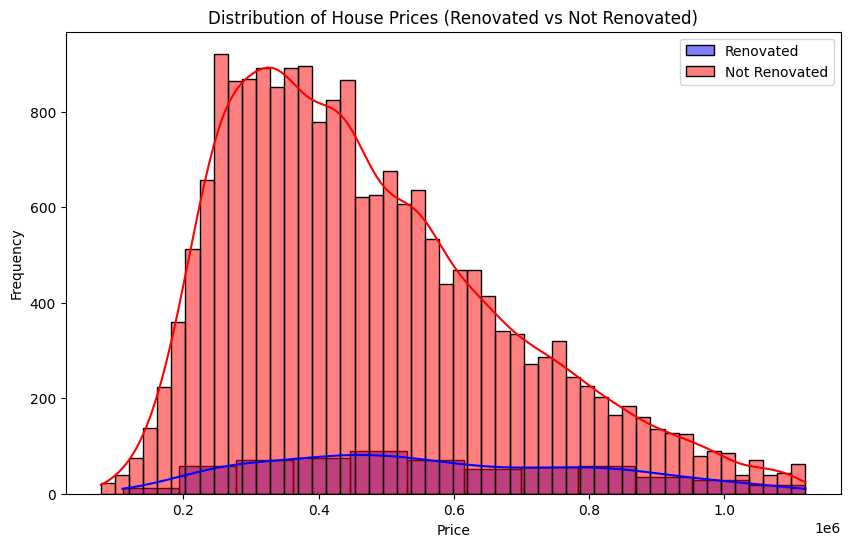

Mean Squared Error: 12130764483.290339
R2 Score: 0.7093063368542198


TypeError: can only concatenate str (not "int") to str

In [216]:

# Analyze the impact of renovations on house prices
renovated = df[df['yr_renovated'] > 0]
not_renovated = df[df['yr_renovated'] == 0]

plt.figure(figsize=(10, 6))
sns.histplot(renovated['price'], kde=True, color='blue', label='Renovated')
sns.histplot(not_renovated['price'], kde=True, color='red', label='Not Renovated')
plt.title('Distribution of House Prices (Renovated vs Not Renovated)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 3: Modeling and Prediction
# Select features and target
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
target = 'price'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Step 4: ROI Calculation
# Calculate the mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Example: Estimating the impact of adding a bathroom
def estimate_renovation_impact(features, renovation_type, increase):
    features[renovation_type] += increase
    return model.predict([features])[0]


# Estimate the impact of adding a bathroom
new_price = estimate_renovation_impact(features, features.index('bathrooms'), 1)
print(f"Price after adding a bathroom: ${new_price:.2f}")
print(f"Estimated increase in price: ${new_price - initial_price:.2f}")

# Step 5: Visualization and Reporting
# Visualizing the impact of renovations
renovations = ['bathrooms', 'bedrooms', 'sqft_living', 'sqft_basement']
impacts = []

for renovation in renovations:
    new_price = estimate_renovation_impact(features, features.index(renovation), 1)
    impacts.append(new_price - initial_price)

impact_df = pd.DataFrame({'Renovation': renovations, 'Estimated Increase in Price': impacts})

plt.figure(figsize=(10, 6))
sns.barplot(x='Renovation', y='Estimated Increase in Price', data=impact_df)
plt.title('Estimated Impact of Renovations on House Price')
plt.xlabel('Renovation Type')
plt.ylabel('Estimated Increase in Price ($)')
plt.show()